# Cost of Living Cities

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [3]:
cities_cost_df = pd.read_csv("../data/clean/cost_of_living_cities_clean.csv")

Movehub Rating: A combination of all scores for an overall rating for a city or country.
Purchase Power: This compares the average cost of living with the average local wage.
Health Care: Compiled from how citizens feel about their access to healthcare, and its quality.
Pollution: Low is good. A score of how polluted people find a city, includes air, water and noise pollution.
Quality of Life: A balance of healthcare, pollution, purchase power, crime rate to give an overall quality of life score.
Crime Rating: Low is good. The lower the score the safer people feel in this city.

In [5]:
cities_cost_df

,Country,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Argentina,Buenos Aires,77.29,29.29,79.17,47.26,39.78,59.46
1,Mexico,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86
2,Philippines,Manila,68.31,14.80,80.56,65.22,13.14,66.36
3,Portugal,Lisbon,77.63,32.48,62.38,28.78,56.08,40.08
4,Serbia,Belgrade,71.65,21.46,52.53,77.08,35.69,37.97
5,Spain,Madrid,85.37,54.07,73.51,55.77,59.87,39.34
6,Thailand,Bangkok,74.21,20.82,95.96,60.39,37.54,36.10
7,Uruguay,Montevideo,71.69,21.56,59.72,31.72,44.63,50.16
8,Vietnam,Hanoi,66.77,12.22,20.83,24.02,5.29,51.81


In [6]:
cities_cost_df.columns


Index(['Country', 'City', 'Movehub Rating', 'Purchase Power', 'Health Care',
       'Pollution', 'Quality of Life', 'Crime Rating'],
      dtype='object')

In [7]:
#drop crime ratings, and rename column
new_cities_cost_df = cities_cost_df.drop(columns=['Crime Rating'])
new_cities_cost_df = new_cities_cost_df.rename(columns={'Movehub Rating': 'Rating'})
new_cities_cost_df



,Country,City,Rating,Purchase Power,Health Care,Pollution,Quality of Life
0,Argentina,Buenos Aires,77.29,29.29,79.17,47.26,39.78
1,Mexico,Mexico City,75.07,24.28,61.76,18.95,27.91
2,Philippines,Manila,68.31,14.80,80.56,65.22,13.14
3,Portugal,Lisbon,77.63,32.48,62.38,28.78,56.08
4,Serbia,Belgrade,71.65,21.46,52.53,77.08,35.69
5,Spain,Madrid,85.37,54.07,73.51,55.77,59.87
6,Thailand,Bangkok,74.21,20.82,95.96,60.39,37.54
7,Uruguay,Montevideo,71.69,21.56,59.72,31.72,44.63
8,Vietnam,Hanoi,66.77,12.22,20.83,24.02,5.29


In [8]:
new_cities_cost_df.columns = new_cities_cost_df.columns.str.lower().str.replace(' ', '_')

In [9]:
new_cities_cost_df.to_csv('../data/clean/cities_cost_data.csv', index=False)

In [10]:
#just quality of life top 5 cities
df_quality_of_life = new_cities_cost_df[['country', 'city', 'quality_of_life']]

df_quality_of_life_sorted = df_quality_of_life.sort_values(by='quality_of_life', ascending=False)
df_quality_of_life_sorted

,country,city,quality_of_life
5,Spain,Madrid,59.87
3,Portugal,Lisbon,56.08
7,Uruguay,Montevideo,44.63
0,Argentina,Buenos Aires,39.78
6,Thailand,Bangkok,37.54
4,Serbia,Belgrade,35.69
1,Mexico,Mexico City,27.91
2,Philippines,Manila,13.14
8,Vietnam,Hanoi,5.29


In [11]:
df_quality_of_life_sorted.to_csv('../data/clean/quality_of_life_sorted.csv', index=False)

In [12]:
top_5_cities_quality_of_life = df_quality_of_life_sorted.head(5)
top_5_cities_quality_of_life = top_5_cities_quality_of_life.reset_index(drop=True)
top_5_cities_quality_of_life

,country,city,quality_of_life
0,Spain,Madrid,59.87
1,Portugal,Lisbon,56.08
2,Uruguay,Montevideo,44.63
3,Argentina,Buenos Aires,39.78
4,Thailand,Bangkok,37.54


In [13]:
top_5_cities_quality_of_life.to_csv('../data/clean/top5_quality_of_life.csv', index=False)

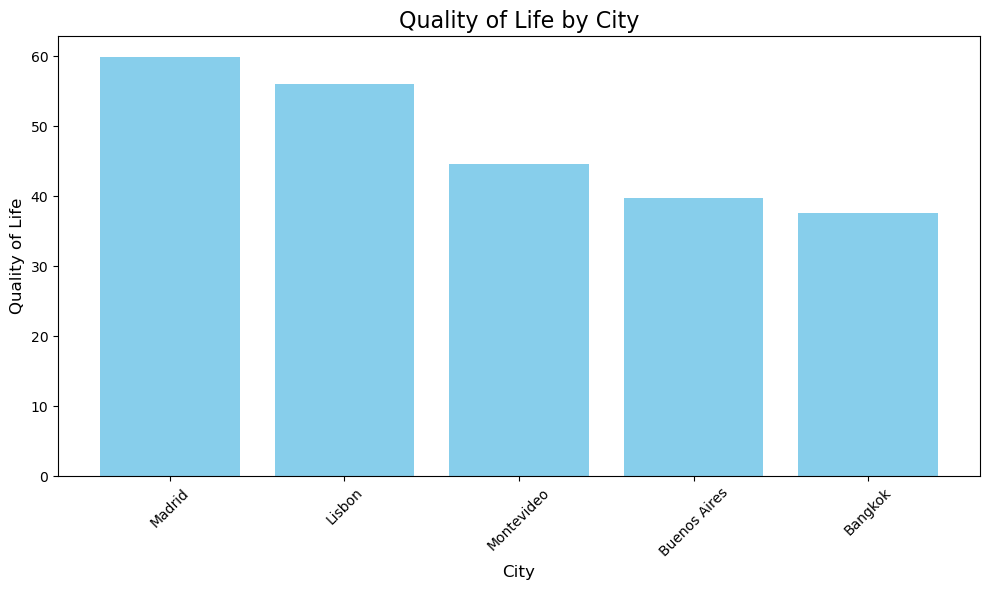

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities_quality_of_life['city'], top_5_cities_quality_of_life['quality_of_life'], color='skyblue')

# Adding title and labels
plt.title('Quality of Life by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Quality of Life', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  

plt.savefig('../Visualisations/quality_of_life_top5_cities.png', dpi=300, bbox_inches='tight')
plt.show()

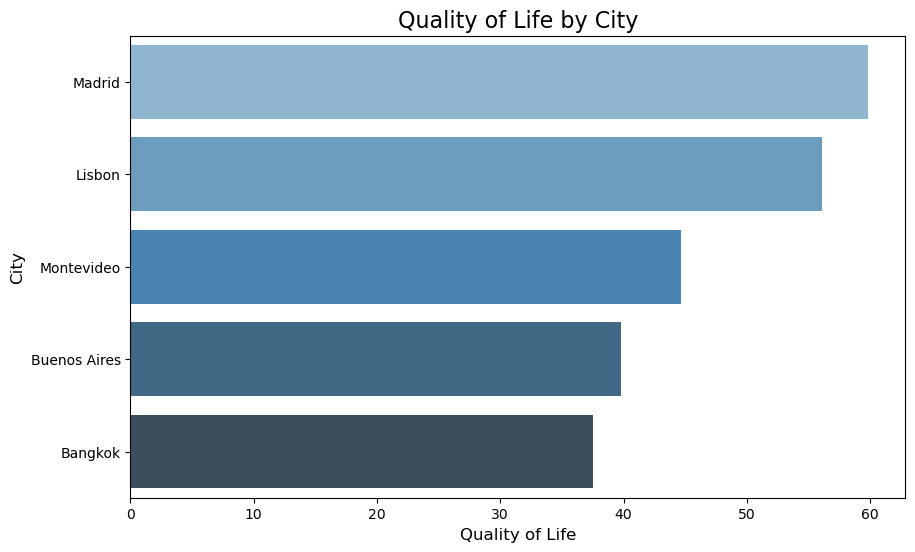

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quality_of_life', y='city', data=top_5_cities_quality_of_life, palette='Blues_d', hue='city', legend=False)


plt.title('Quality of Life by City', fontsize=16)
plt.xlabel('Quality of Life', fontsize=12)
plt.ylabel('City', fontsize=12)


plt.tight_layout
plt.savefig('../Visualisations/Quaity_of_life_by_cites.png', dpi=100, bbox_inches='tight')
plt.show()

# Cost of living Countries

In [17]:
countries_cost_df = pd.read_csv("../data/clean/cost_of_living_countries_clean.csv")
countries_cost_df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Argentina,29.4,7.6,18.9,29.7,24.8,41.5
1,Colombia,28.8,8.6,19.1,30.3,20.5,33.7
2,Estonia,52.0,15.0,34.2,46.4,50.6,80.4
3,Georgia,33.4,13.7,23.9,33.3,31.6,35.3
4,Mexico,40.2,15.5,28.4,43.4,35.7,45.4
5,Philippines,31.0,7.1,19.6,35.0,16.8,33.3
6,Portugal,45.1,24.0,35.0,43.8,36.9,56.9
7,Serbia,37.7,12.4,25.6,36.0,31.2,50.2
8,Spain,47.3,22.9,35.6,46.0,44.1,92.1
9,Thailand,34.1,11.2,23.1,40.5,18.3,40.8


In [18]:
countries_cost_df.columns

Index(['Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [19]:
new_countries_cost_df= countries_cost_df.drop(columns=['Cost of Living Index',
       'Cost of Living Plus Rent Index',
       'Restaurant Price Index'])

In [20]:
new_countries_cost_df.columns = new_countries_cost_df.columns.str.lower().str.replace(' ', '_')

In [21]:
new_countries_cost_df

,country,rent_index,groceries_index,local_purchasing_power_index
0,Argentina,7.6,29.7,41.5
1,Colombia,8.6,30.3,33.7
2,Estonia,15.0,46.4,80.4
3,Georgia,13.7,33.3,35.3
4,Mexico,15.5,43.4,45.4
5,Philippines,7.1,35.0,33.3
6,Portugal,24.0,43.8,56.9
7,Serbia,12.4,36.0,50.2
8,Spain,22.9,46.0,92.1
9,Thailand,11.2,40.5,40.8


In [22]:
new_countries_cost_df.to_csv('../data/clean/cost_of_living_v1.csv', index=False)

# Global income

In [24]:
global_df = pd.read_csv("../data/clean/global_income_clean.csv")
global_df 

,Country,Cost index,Ø Monthly income,Purchasing power index
0,Argentina,33.4,550 USD,15.0
1,Colombia,38.2,543 USD,22.3
2,Estonia,55.0,"1,900 USD",35.0
3,Georgia,36.7,468 USD,20.0
4,Mexico,58.5,868 USD,23.3
5,Philippines,36.5,329 USD,14.2
6,Portugal,67.9,"2,150 USD",49.7
7,Serbia,47.4,762 USD,25.2
8,Spain,73.0,"2,640 USD",56.9
9,Thailand,34.7,603 USD,27.3


In [25]:
avg_income_df = global_df[["Country", "Ø Monthly income"]]
avg_income_df.columns

Index(['Country', 'Ø Monthly income'], dtype='object')

In [26]:
new_avg_income_df = avg_income_df.rename(columns={"Ø Monthly income":"Monthly Income"})
new_avg_income_df.columns = new_avg_income_df.columns.str.lower().str.replace(' ', '_')
new_avg_income_df

,country,monthly_income
0,Argentina,550 USD
1,Colombia,543 USD
2,Estonia,"1,900 USD"
3,Georgia,468 USD
4,Mexico,868 USD
5,Philippines,329 USD
6,Portugal,"2,150 USD"
7,Serbia,762 USD
8,Spain,"2,640 USD"
9,Thailand,603 USD


# Merge averge income table and cost of living countries

In [28]:
merged_countries_df = pd.merge(new_countries_cost_df,new_avg_income_df, on = "country" ) 
merged_countries_df

,country,rent_index,groceries_index,local_purchasing_power_index,monthly_income
0,Argentina,7.6,29.7,41.5,550 USD
1,Colombia,8.6,30.3,33.7,543 USD
2,Estonia,15.0,46.4,80.4,"1,900 USD"
3,Georgia,13.7,33.3,35.3,468 USD
4,Mexico,15.5,43.4,45.4,868 USD
5,Philippines,7.1,35.0,33.3,329 USD
6,Portugal,24.0,43.8,56.9,"2,150 USD"
7,Serbia,12.4,36.0,50.2,762 USD
8,Spain,22.9,46.0,92.1,"2,640 USD"
9,Thailand,11.2,40.5,40.8,603 USD


In [29]:
merged_countries_df.to_csv('../data/clean/merged_cost-of.csv', index=False)

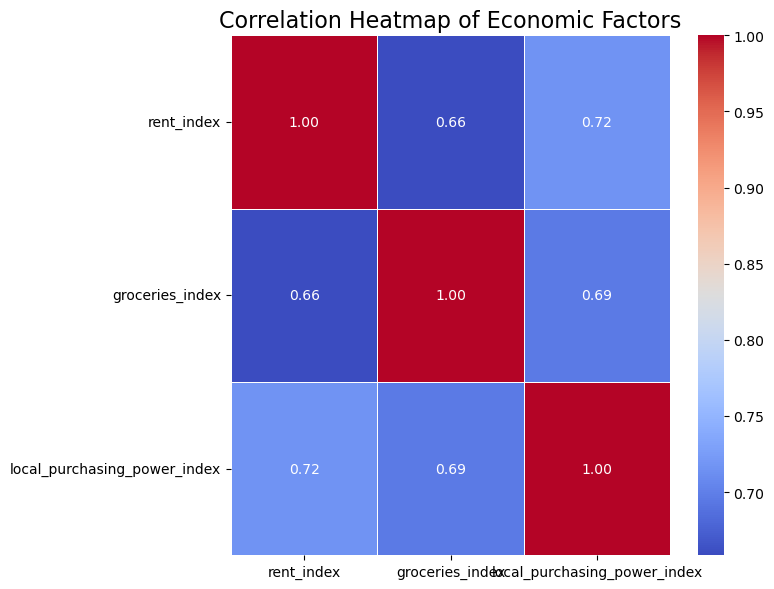

In [30]:

# Data for correlation
correlation_data = merged_countries_df[['rent_index', 'groceries_index', 'local_purchasing_power_index']]


corr = correlation_data.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Correlation Heatmap of Economic Factors', fontsize=16)


plt.tight_layout()

plt.savefig('../Visualisations/heatmap_countries_economic_factors.png', dpi=100, bbox_inches='tight')
plt.show()

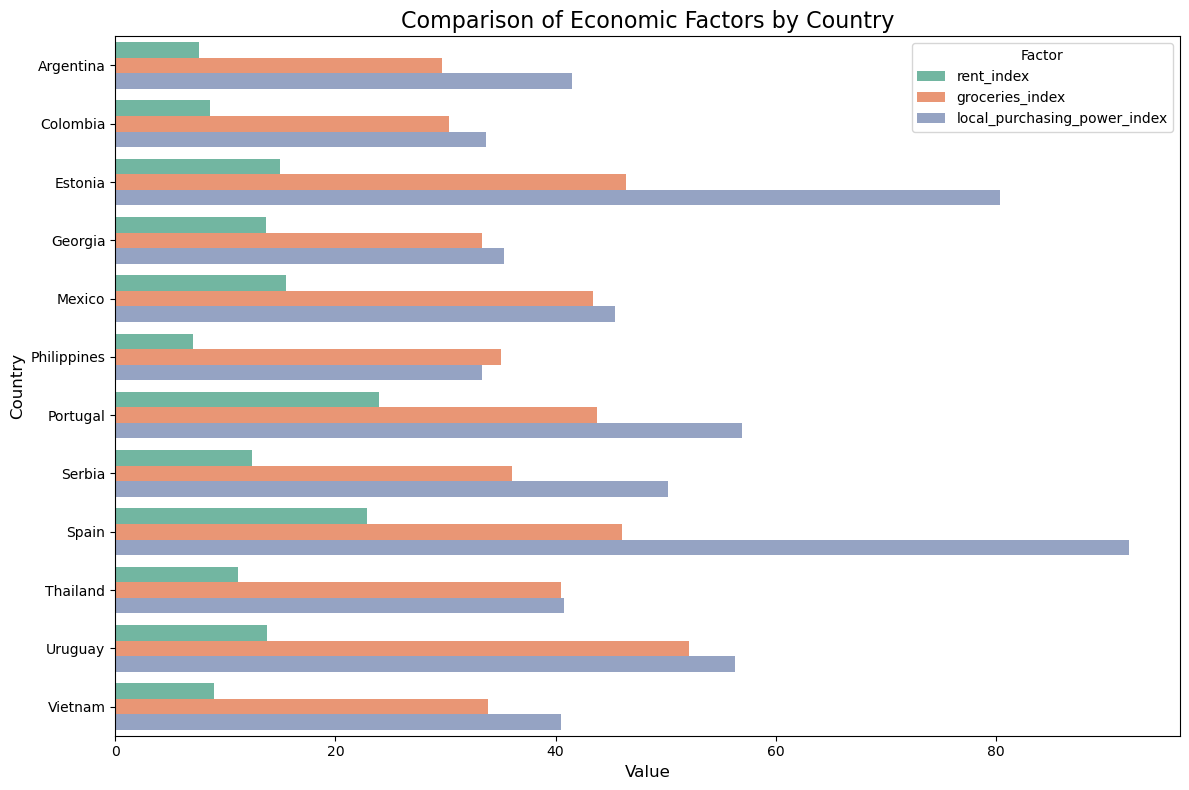

In [31]:
#melt

df_melted = merged_countries_df.melt(id_vars=['country'], value_vars=['rent_index', 'groceries_index', 
                                                    'local_purchasing_power_index'],
                    var_name='Factor', value_name='Value')

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Value', y='country', hue='Factor', data=df_melted, palette='Set2')

plt.title('Comparison of Economic Factors by Country', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.tight_layout()

# Save the plot
plt.savefig('../Visualisations/comparison_economic_factors_countries.png', dpi=100, bbox_inches='tight')
plt.show()

In [32]:
#Top5 countries
scaler = MinMaxScaler()

# List of factors you want to normalize
factors = ['rent_index', 'groceries_index', 'local_purchasing_power_index']

# Normalize the factors by applying MinMaxScaler
merged_countries_df[factors] = scaler.fit_transform(merged_countries_df[factors])

# Coverall score 
merged_countries_df['overall_score'] = merged_countries_df[factors].sum(axis=1)

# top 5
top_5_countries = merged_countries_df[['country', 'overall_score']].sort_values(by='overall_score', ascending=False).head(5)


top_5_countries

,country,overall_score
8,Spain,2.662590
6,Portugal,2.030825
2,Estonia,2.014012
10,Uruguay,1.787606
4,Mexico,1.314431
